# 💤 **Sleep Analysis using a Sleep, Health & Lifestyle Dataset** 💤

## 🔍 **Overview of the Dataset & aims of the project**

The [Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data "Dataset") we're looking at in this project contains information about individuals' sleep, health and lifestyle.


We will be looking at how health and lifestyle affects sleep, aiming to explore how sleep is affected by:

❓ Age

❓ Gender

❓ Occupation

❓ Physical Activity

❓ Stress

❓ BMI

For reference, the two categories of Sleep Disorder we are looking at are as follows:

* [**Insomnia**](https://www.nhs.uk/conditions/insomnia/ "Insomnia") - difficulty falling asleep or staying asleep, which leads to inadequate or poor quality sleep.
* [**Sleep Apnea**](https://www.nhs.uk/conditions/sleep-apnoea/ "Sleep Apnea") - pauses in breathing during sleep which results in disrupted sleep patterns and potential health risks.


↘️ Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from termcolor import colored
from sklearn.model_selection import train_test_split

↘️ Loading the Dataset

In [2]:
df = pd.read_csv("C:\\Users\\emmaj\\Desktop\\PROJECT\\sleep_health_and_lifestyle_dataset.csv")

↘️ Setting display settings

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 400)

↘️ Starting the initial assessment of the Dataset by taking a look at the first 5 rows

In [4]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


↘️ Taking a sample of the Dataset shows that we have 'Normal Weight' and 'Normal' recorded in BMI Category; **we will rectify this when we clean the data**

In [5]:
df.sample(30)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
10,11,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,None
170,171,Male,41,Lawyer,7.7,8,90,5,Normal,130/85,70,8000,None
63,64,Male,32,Doctor,6.2,6,30,8,Normal,125/80,72,5000,None
126,127,Male,38,Lawyer,7.3,8,60,5,Normal,130/85,68,8000,None
305,306,Female,51,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
350,351,Female,57,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
111,112,Male,37,Lawyer,7.4,8,60,5,Normal,130/85,68,8000,None
139,140,Male,38,Lawyer,7.1,8,60,5,Normal,130/85,68,8000,None
287,288,Female,50,Nurse,6.0,6,90,8,Overweight,140/95,75,10000,Sleep Apnea


↘️ Viewing information about the Datset, we can see that there are:

* 374 rows
* 13 columns

↘️ Also: 

* There aren't any null values
* 5 columns (Gender, Occupation, BMI Category, Blood Pressure and Sleep Disorder) are text or mixed types
* The rest are numeric

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


↘️ Returning a description of the numeric rows of the Dataset we find:
* Average **Age** is 42
* Average **Sleep Duration** is 7.13hrs
* Average **Quality of Sleep** score is 7.3
* Average **Physical Activity Level** is 59 minutes
* Average **Stress Level** score is 5.39
* Average **Heart Rate** is 70.17
* Average **Daily Steps** is 6817

In [7]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


↘️ Listing the columns, we have the following:

| **COLUMN**              | **DESCRIPTION**                                                                                                             |
| -------------           |-------------                                                                                                                |
| Person ID               | An identifier for each person                                                                                               |
| Gender                  | Gender of the person (Male/Female)                                                                                          |
| Age                     | Age of the person in years                                                                                                  |
| Occupation              | Occupation/profession of the person                                                                                         |
| Sleep Duration          | Number of hours the person sleeps per day                                                                                   |
| Quality of Sleep        | (Scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10                                            |
| Physical Activity Level | (minutes/day): The number of minutes the person engages in physical activity daily                                          |
| Stress Level            | (Scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10                      |
| BMI Category            | The BMI category of the person (e.g., Normal, Overweight, Obese)                                                            |
| Blood Pressure          | (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure  |
| Heart Rate              | (bpm): The resting heart rate of the person in beats per minute                                                             |
| Daily Steps             | The number of steps the person takes per day                                                                                |
| Sleep Disorder          | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea)                                     |

In [8]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

↘️ Looking at the shape of the Dataset we find there are 374 rows and 13 columms

In [9]:
df.shape

(374, 13)

↘️ Viewing the number of unique values

In [10]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

## 🛁 **Cleaning the data**

↘️ Checking for missing values - **we find there are none**

In [11]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

↘️ Checking for duplicated values - **we find there are no duplicates**

In [12]:
df.duplicated().sum()

np.int64(0)

↘️ As mentioned in the overview (and shown in the sample) we need to **replace 'Normal' with 'Normal Weight'** in BMI Category 

In [13]:
df['BMI Category']=df['BMI Category'].replace({'Normal':'Normal Weight'})

## 📈 **Analysis**

↘️ Looking at the Gender column we see that **males are slightly more prevalant in the Dataset** - there are 189 males and 185 females

In [14]:
gender_count=df['Gender'].value_counts().reset_index()
gender_count

,Gender,count
0,Male,189
1,Female,185


↘️ Looking at the Age column shows the **average age is 42**, **the youngest is 27** and **the oldest is 59**

In [15]:
df['Age'].describe()

count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64

↘️ Looking at the Occupation column we have **11 unique occupations**, they are as follows:

* Engineer
* Doctor
* Sales Representative
* Teacher
* Nurse
* Engineer
* Accountant
* Scientist
* Lawyer
* Salesperson
* Manager

In [16]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

↘️ Looking at the value counts of Occupations we find that **the medical field is potentially overrepresented** in the Dataset with 'Nurse' and 'Doctor' being the most common

☑️ This is **balanced out by the rest of the occupations which are non-medical**

In [17]:
Occupation_count=df['Occupation'].value_counts().reset_index()
Occupation_count

,Occupation,count
0,Nurse,73
1,Doctor,71
2,Engineer,63
3,Lawyer,47
4,Teacher,40
5,Accountant,37
6,Salesperson,32
7,Scientist,4
8,Software Engineer,4
9,Sales Representative,2


↘️ Looking at the Sleep Duration column we can see that **7.2hrs is the most common amount of sleep**

In [18]:
Sleep_Duration_count=df['Sleep Duration'].value_counts().reset_index()
Sleep_Duration_count

,Sleep Duration,count
0,7.2,36
1,6.0,31
2,7.8,28
3,6.5,26
4,6.1,25
5,7.7,24
6,6.6,20
7,7.1,19
8,8.1,15
9,7.3,14


↘️ Looking at the Quality of Sleep column (which contains a subjective rating of the quality of sleep on a scale of 1 to 10) we find the unique scores are:

* 4
* 5
* 6
* 7
* 8
* 9

In [19]:
df['Quality of Sleep'].unique()

array([6, 4, 7, 5, 8, 9])

↘️ Looking at the Quality of Sleep column we can see that a **rating of 8 was the most popular** closely followed by 6

In [20]:
Quality_of_Sleep_count=df['Quality of Sleep'].value_counts().reset_index()
Quality_of_Sleep_count

,Quality of Sleep,count
0,8,109
1,6,105
2,7,77
3,9,71
4,5,7
5,4,5


↘️ Looking at the Physical Activity Level column we can see that the **average level recorded is 59 minutes/day**, the **lowest is 30 mins/day** and the **highest is 90 mins/day**

☑️ This suggests that the people in the Dataset **achieve more than the recommended physical activity guidelines** [set by the NHS](https://www.nhs.uk/live-well/exercise/physical-activity-guidelines-for-adults-aged-19-to-64/ "set by the NHS")

In [21]:
df['Physical Activity Level'].describe()

count    374.000000
mean      59.171123
std       20.830804
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

↘️ Looking at the Physical Activity Level column again we can see that **60 mins/day is most popular closely** followed by 30, 45, 75 and 90

In [22]:
Physical_Activity_Level=df['Physical Activity Level'].value_counts().reset_index()
Physical_Activity_Level

,Physical Activity Level,count
0,60,70
1,30,68
2,45,68
3,75,67
4,90,67
5,40,6
6,55,6
7,35,4
8,50,4
9,70,3


↘️ Looking at the Stress Level column (which contains a subjective rating of the quality of sleep on a scale of 1 to 10) we find the unique scores are:

* 3
* 4
* 5
* 6
* 7
* 8

In [23]:
df['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5])

↘️ Looking again at the Stress Level column we see that the most popular stress level recorded is 3 which is very closely followed by 8 and 4

☑️ This shows quite a difference which gives us a **mixed sample** to analyse

In [24]:
Stress_Level_counts=df['Stress Level'].value_counts().reset_index()
Stress_Level_counts

,Stress Level,count
0,3,71
1,8,70
2,4,70
3,5,67
4,7,50
5,6,46


↘️ Looking more closely at the link between the Occupation and Stress Level columns we can conclude the following:
* Accountants most commonly rate their stress level as 4
* Doctors most commonly rate their stress level as 8 (closely followed by 6)
* Engineers most commonly rate their stress level as 3
* Lawyers most commonly rate their stress level as 5 (closely followed by 3)
* The single manager rated their stress level as 5
* Nurses most commonly rate their stress level as 8
* The single Sales Representative rated their stress level as 8
* The single Salesperson rated their stress level as 7
* The same number of Scientists rated their stress levels as 6 and 8
* Software Engineers most commonly rate their stress level as 5
* Teachers most commonly rate their stress level as 4  

In [25]:
position_stress=df.groupby('Occupation')['Stress Level'].value_counts().reset_index()
position_stress

,Occupation,Stress Level,count
0,Accountant,4,26
1,Accountant,7,6
2,Accountant,6,3
3,Accountant,3,2
4,Doctor,8,33
5,Doctor,6,32
6,Doctor,3,4
7,Doctor,5,2
8,Engineer,3,34
9,Engineer,5,16


↘️ Looking at the BMI Category column we find 3 unique categories which are:
* Normal Weight
* Overweight
* Obese

In [26]:
df['BMI Category'].unique()

array(['Overweight', 'Normal Weight', 'Obese'], dtype=object)

↘️ Looking more closely at the BMI Category column we see that the **majority of people are of a normal weight**, **148 are overweight** and **10 are obese**

In [27]:
BMI_Category_count=df['BMI Category'].value_counts().reset_index()
BMI_Category_count

,BMI Category,count
0,Normal Weight,216
1,Overweight,148
2,Obese,10


↘️ Looking at the unique values for Blood Pressure gives us the following:
* 115/75
* 115/78
* 117/76
* 118/75
* 118/76
* 119/77
* 120/80
* 121/79
* 122/80
* 125/80
* 125/82
* 126/83
* 128/84
* 128/85
* 129/84
* 130/85
* 130/86
* 131/86
* 132/87
* 135/88
* 135/90
* 139/91
* 140/90
* 140/95
* 142/92

In [28]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

↘️ Looking more closely we can see that the **most popular Blood Pressure reading is 130/85 which is considered as high normal** by the [NHS guidelines](https://www.nhs.uk/tests-and-treatments/blood-pressure-test/ "NHS guidelines")

As a general guide:

* Normal blood pressure is considered to be between 90/60mmHg and 120/80mmHg (this applies if it's measured at home or at a pharmacy, GP surgery or clinic)
* High blood pressure is considered to be 135/85 or higher if your reading was taken at home, or 140/90mmHg or higher if your reading was taken at a pharmacy, GP surgery or clinic
* Low blood pressure is considered to be 89/59mmHg or lower

In [29]:
Blood_Pressure_count=df['Blood Pressure'].value_counts().reset_index()
Blood_Pressure_count

,Blood Pressure,count
0,130/85,99
1,140/95,65
2,125/80,65
3,120/80,45
4,115/75,32
5,135/90,27
6,140/90,4
7,125/82,4
8,128/85,3
9,132/87,3


↘️ Looking at the Heart Rate column we find the **top 3 most recorded heart rates are 68, 70 and 72 which are all within the normal pulse rate range** as per the [British Heart Foundation](https://www.bhf.org.uk/informationsupport/heart-matters-magazine/medical/ask-the-experts/pulse-rate "British Heart Foundation")

In [30]:
Heart_Rate_count=df['Heart Rate'].value_counts().reset_index()
Heart_Rate_count

,Heart Rate,count
0,68,94
1,70,76
2,72,69
3,65,67
4,75,36
5,78,5
6,85,3
7,80,3
8,77,2
9,76,2


↘️ Looking at the Daily Steps column we find that the **average number of steps is 6817**, the **smallest number recorded is 3000** and the **highest recorded is 10000**

☑️ The average is **well below the 10,000 daily steps target to stay healthy** as per the [British Heart Foundation](https://www.bhf.org.uk/informationsupport/heart-matters-magazine/activity/how-many-steps-a-day-should-i-walk-for-my-heart-health "British Heart Foundation")

In [31]:
df['Daily Steps'].describe()

count      374.000000
mean      6816.844920
std       1617.915679
min       3000.000000
25%       5600.000000
50%       7000.000000
75%       8000.000000
max      10000.000000
Name: Daily Steps, dtype: float64

↘️ Looking at the Sleep Disorder category we see that there are 3 categories:

* None

* Sleep Apnea

* Insomnia

In [32]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

↘️ Checking for value counts in the Sleep Disorder columm we find there are **78 with Sleep Apnea** and **77 with Insomnia**

☑️ The **majority of people do NOT have a sleep disorder**

In [33]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

↘️ Taking a brief look at the potential link between Sleep Disorder and Gender we can see that:

☑️ Women are **significantly more likely** to have a sleep disorder

☑️ Men **suffer from insomnia more** than women 

☑️ Women **suffer from sleep apnea significantly more** than men do

In [34]:
df.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
None            Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64

## 📊 **Visualisation**

We will now represent the initial findings in our analysis in a series of charts

## ↘️ Age & Gender Distribution

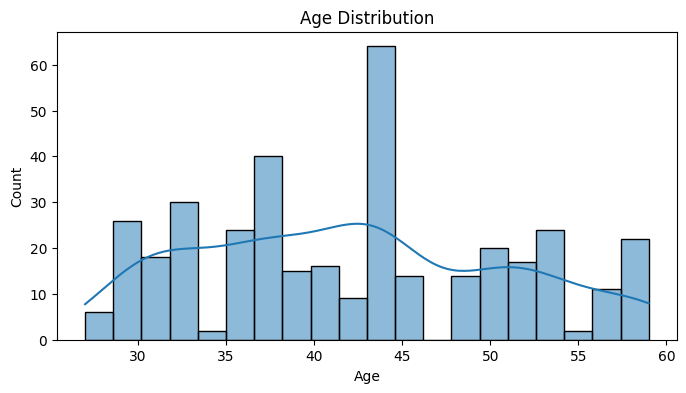

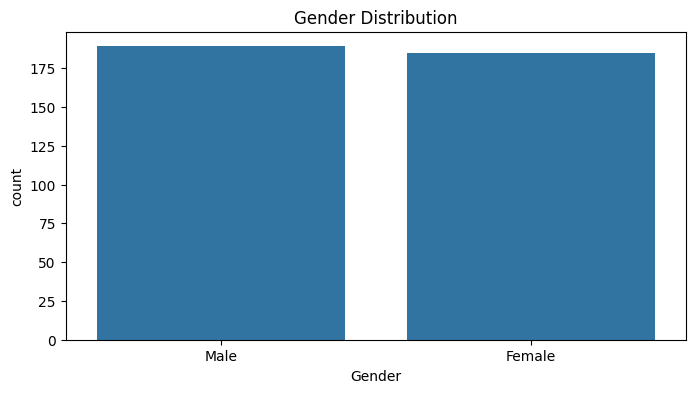

In [35]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

## ↘️ Occupation

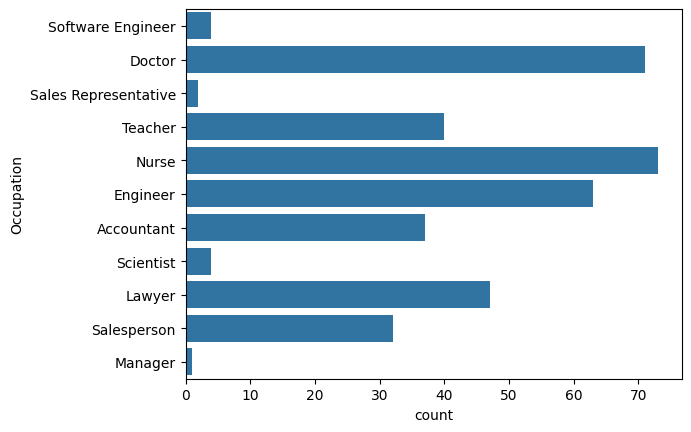

In [36]:
sns.countplot(y='Occupation', data = df)
plt.show()

## ↘️ Physical Activity Level

In [37]:
fig=px.bar(Physical_Activity_Level,x='Physical Activity Level',y='count',title='Physical Activity Level')
fig.show()


## ↘️ Stress Level

In [38]:
fig = px.pie(Stress_Level_counts,values='count',names='Stress Level',title=" Stress Level")
fig.show()

## ↘️ BMI

In [39]:
fig=px.pie(BMI_Category_count,values='count',names='BMI Category',title="BMI")
fig.show()

## ↘️ Blood Pressure

In [40]:
fig=px.bar(Blood_Pressure_count,x="Blood Pressure",y="count",title="Blood Pressure")
fig.show()

## ↘️ Heart Rate

In [41]:
fig=px.bar(Heart_Rate_count,x="Heart Rate",y="count",title="Heart Rate")
fig.show()

## ↘️ Quality of Sleep

In [42]:
fig=px.bar(Quality_of_Sleep_count,x='Quality of Sleep',y='count',title='Quality of Sleep')
fig.show()

## ↘️ Sleep Duration

In [43]:
fig=px.bar(Sleep_Duration_count,x='Sleep Duration',y='count',title='Sleep Duration')
fig.show()

## ↘️ Relationship between Sleep Duration & Quality of Sleep

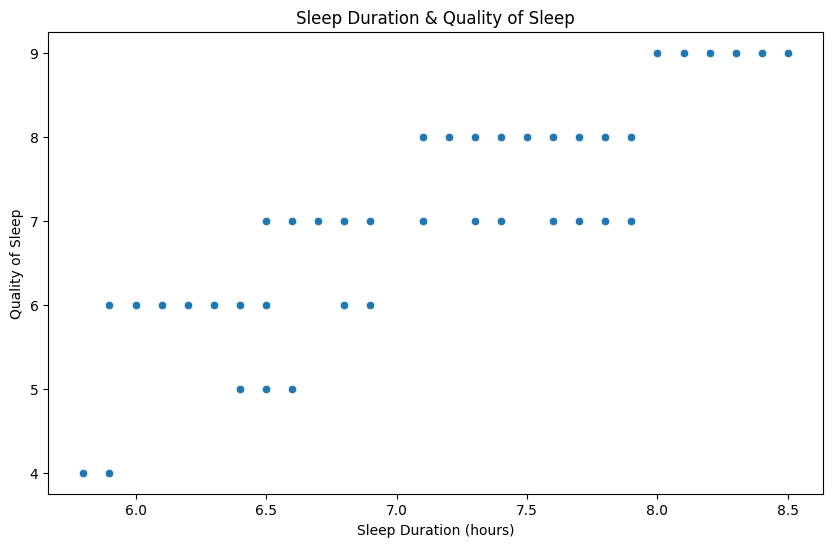

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sleep Duration', y='Quality of Sleep')
plt.title('Sleep Duration & Quality of Sleep')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quality of Sleep')
plt.show()

## ↘️ Relationship between Age & Sleep Disorder

☑️ Our findings:

❌ Inconclusive

* Insomnia appears to be slightly more prevalent in the under 55s but the oldest person in the sample 59 so we would need a broader range of ages to draw any conclusions

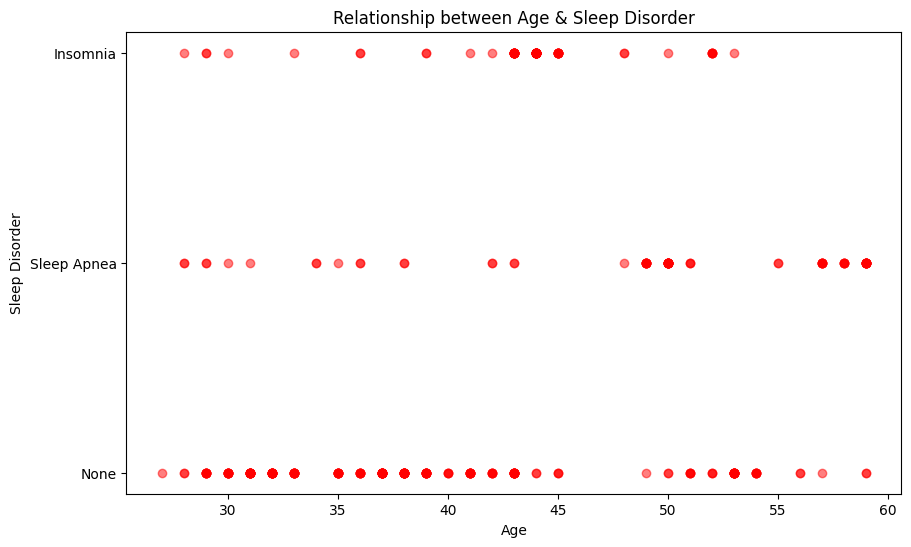

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['Sleep Disorder'], alpha=0.5, color='red')
plt.title('Relationship between Age & Sleep Disorder')
plt.xlabel('Age')
plt.ylabel('Sleep Disorder')
plt.show()

## ↘️ Relationship betwen Gender & Sleep Disorder

☑️ Our findings:

* Women are **significantly more likely** to have a sleep disorder

* Men **suffer from insomnia more** than women do

* Women **suffer from sleep apnea significantly more** than men do

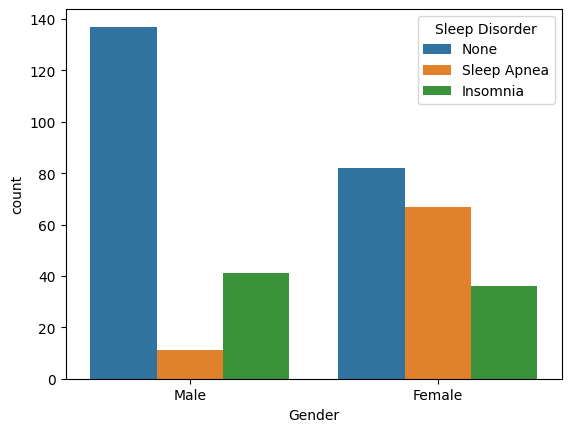

In [46]:
sns.countplot(x='Gender', data = df, hue='Sleep Disorder')
plt.show()

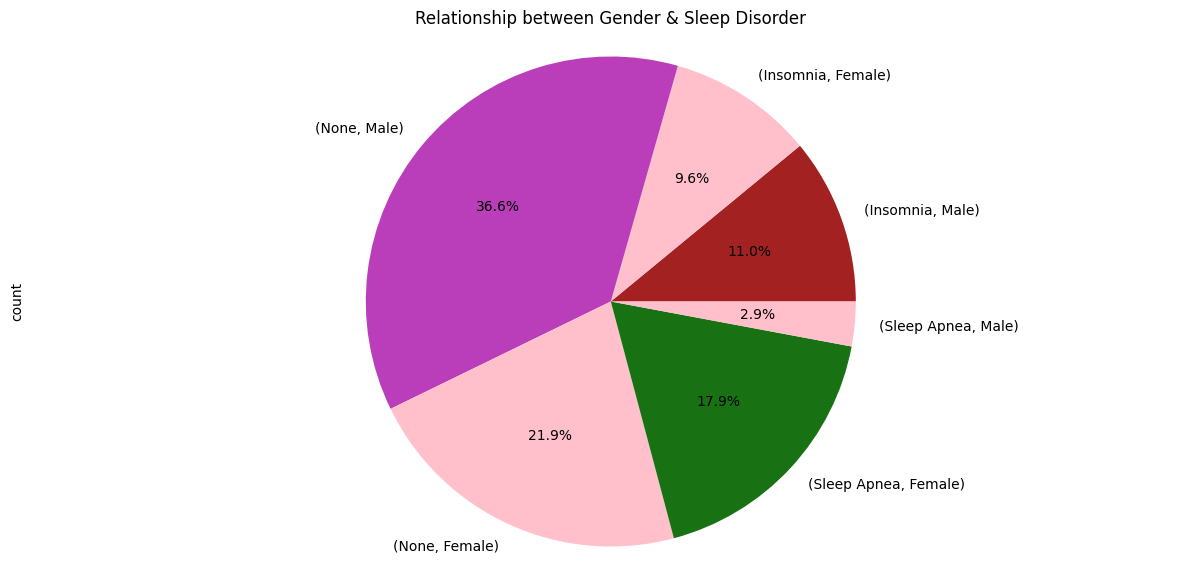

In [47]:
df.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%',figsize=(15,7),
                                                                       colors=["#A32121",'pink',"#BA3EBA",'pink',"#187213",'pink'])
plt.title('Relationship between Gender & Sleep Disorder')
plt.axis('equal')
plt.show()

## ↘️ Average Sleep Duration by Occupation

☑️ Our findings:

* Sales Representatives are the most stressed, have the poorest quality of sleep and sleep for the shortest amount of time

* Engineers are the less stressed, have the highest quality of sleep and sleep for the longest amount of time

              Occupation  Sleep Duration
0             Accountant        7.113514
1                 Doctor        6.970423
2               Engineer        7.987302
3                 Lawyer        7.410638
4                Manager        6.900000
5                  Nurse        7.063014
6   Sales Representative        5.900000
7            Salesperson        6.403125
8              Scientist        6.000000
9      Software Engineer        6.750000
10               Teacher        6.690000


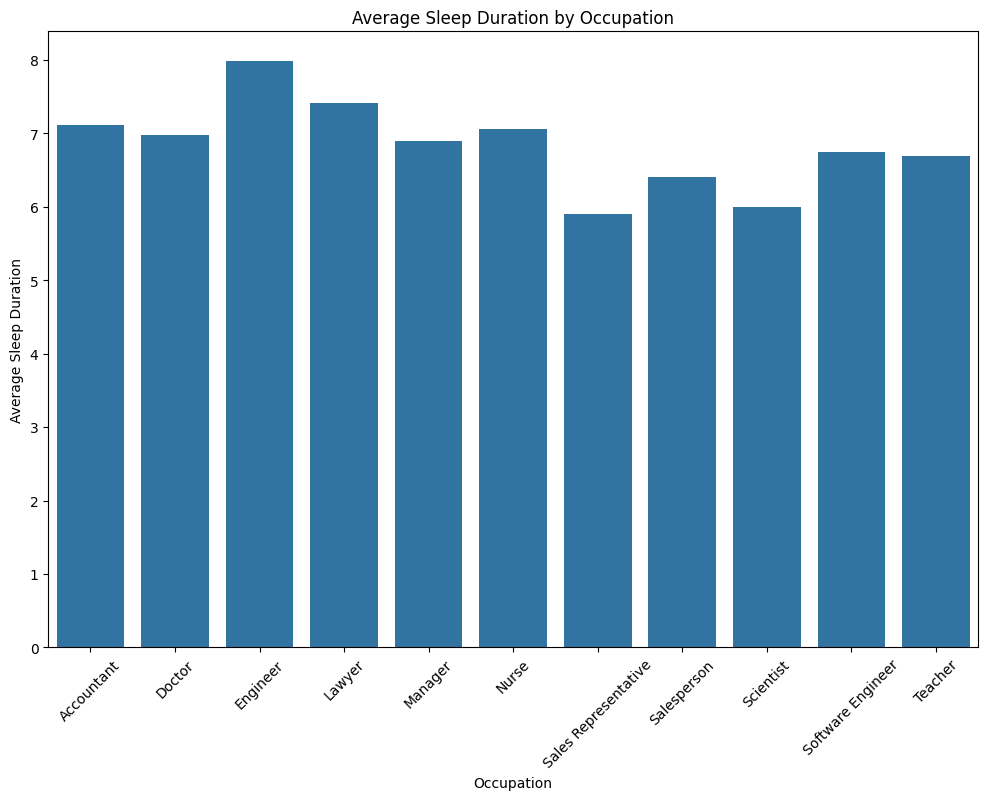

In [48]:
average_sleep_by_occupation = df.groupby('Occupation')['Sleep Duration'].mean().reset_index()
print(average_sleep_by_occupation)

plt.figure(figsize=(12, 8))
sns.barplot(data=average_sleep_by_occupation, x='Occupation', y='Sleep Duration')
plt.title('Average Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Duration')
plt.xticks(rotation=45)
plt.show()

## ↘️ Average Stress Level & Quality of Sleep by Occupation

              Occupation  Stress Level  Quality of Sleep
0             Accountant      4.594595          7.891892
1                 Doctor      6.732394          6.647887
2               Engineer      3.888889          8.412698
3                 Lawyer      5.063830          7.893617
4                Manager      5.000000          7.000000
5                  Nurse      5.547945          7.369863
6   Sales Representative      8.000000          4.000000
7            Salesperson      7.000000          6.000000
8              Scientist      7.000000          5.000000
9      Software Engineer      6.000000          6.500000
10               Teacher      4.525000          6.975000


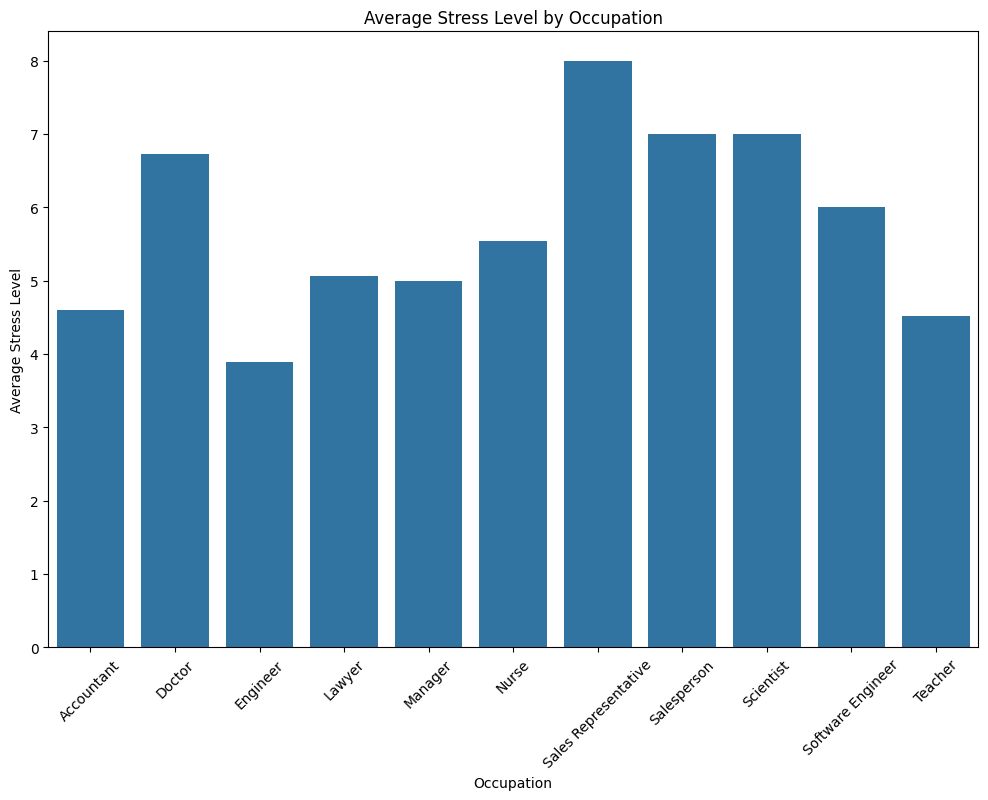

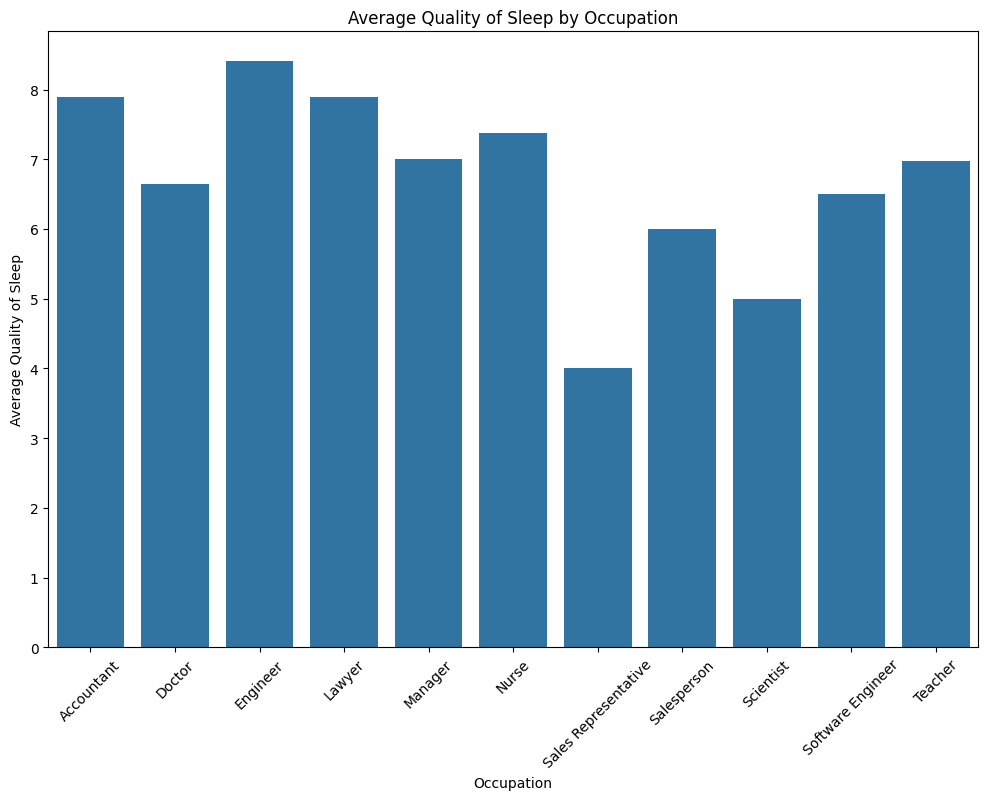

In [49]:
stress_sleep_by_occupation = df.groupby('Occupation')[['Stress Level', 'Quality of Sleep']].mean().reset_index()
print(stress_sleep_by_occupation)

plt.figure(figsize=(12, 8))
sns.barplot(data=stress_sleep_by_occupation, x='Occupation', y='Stress Level')
plt.title('Average Stress Level by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Stress Level')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=stress_sleep_by_occupation, x='Occupation', y='Quality of Sleep')
plt.title('Average Quality of Sleep by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Quality of Sleep')
plt.xticks(rotation=45)
plt.show()

## ↘️ Relationship between Physical Activity Level & Sleep Duration

☑️ Our findings:

* The relationship between Physical Activity Level and Sleep Duration suggests that those who are more physically active sleep for longer

❌ The relationship between Physical Activity Level and Quality of Sleep is inconclusive

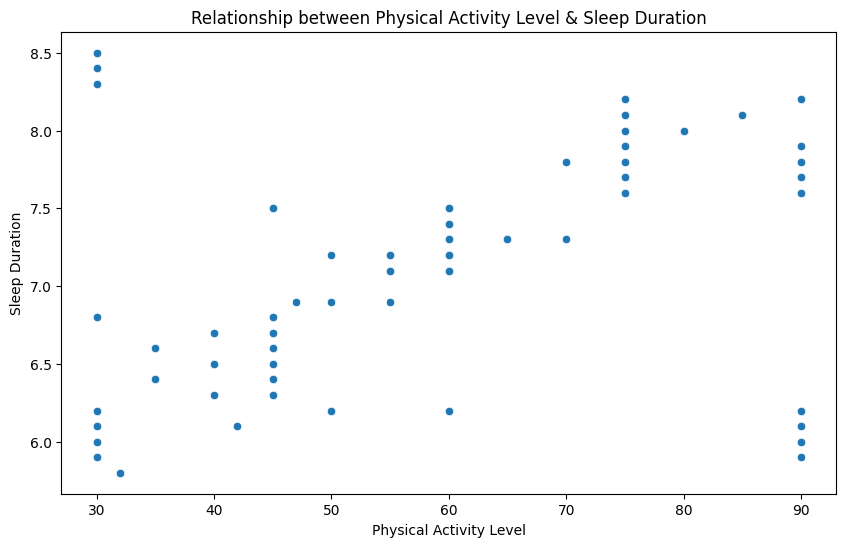

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Physical Activity Level', y='Sleep Duration')
plt.title('Relationship between Physical Activity Level & Sleep Duration')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration')
plt.show()

correlation_activity_sleep_duration = df['Physical Activity Level'].corr(df['Sleep Duration'])

## ↘️ Relationship between Physical Activity Level & Quality of Sleep

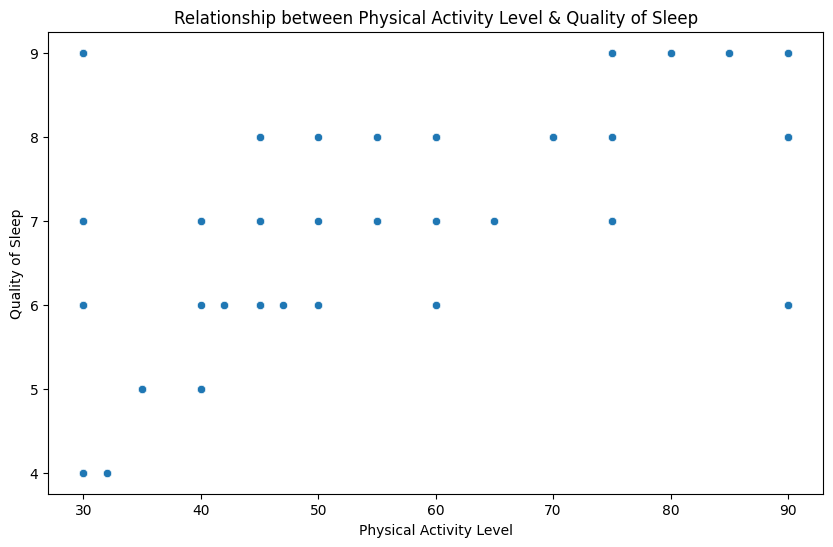

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Physical Activity Level', y='Quality of Sleep')
plt.title('Relationship between Physical Activity Level & Quality of Sleep')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')
plt.show()

correlation_activity_sleep_quality = df['Physical Activity Level'].corr(df['Quality of Sleep'])

## ↘️ Relationship between Stress Level & Sleep Duration

☑️ Our findings:

* The relationship between Stress Level and Sleep Duration suggests those who feel less stressed enjoy more sleep
* The relationship between Stress Level and Sleep Quality suggests those who feel less stressed enjoy better quality sleep

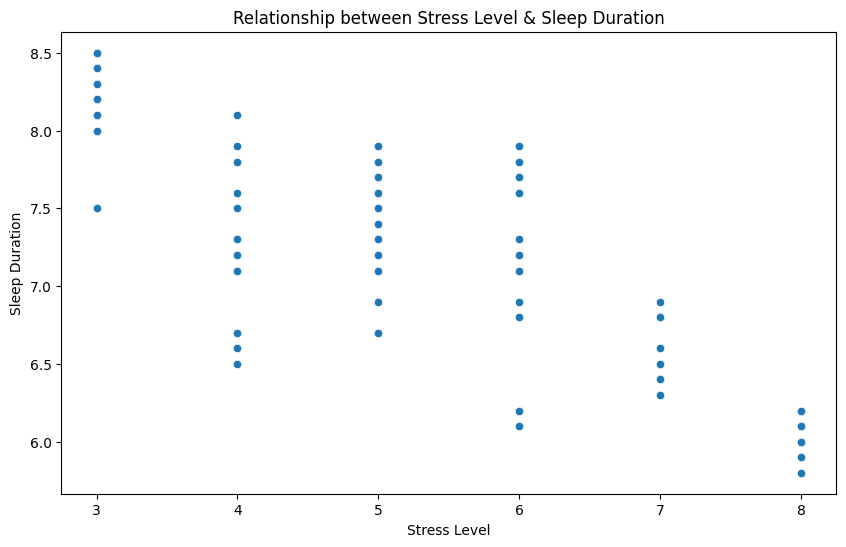

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Stress Level', y='Sleep Duration')
plt.title('Relationship between Stress Level & Sleep Duration')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')
plt.show()
correlation_stress_sleep_duration = df['Stress Level'].corr(df['Sleep Duration'])

## ↘️ Relationship between Stress Level & Quality of Sleep

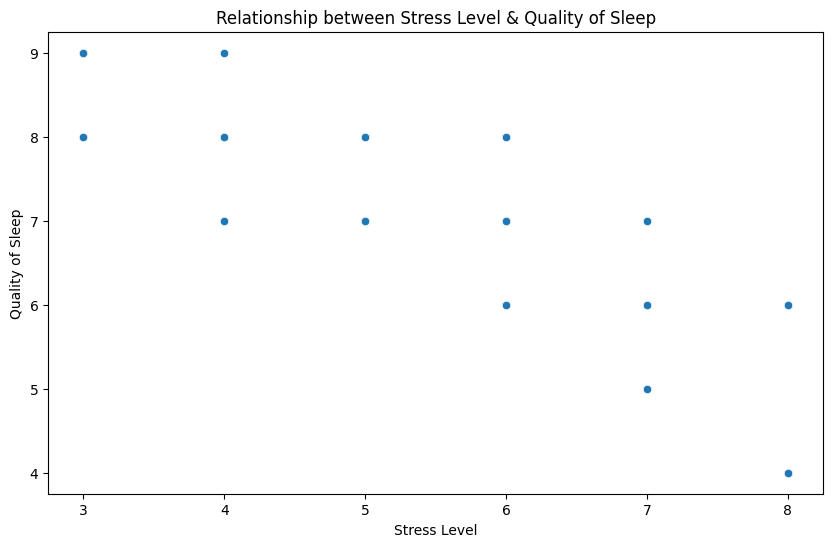

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Stress Level', y='Quality of Sleep')
plt.title('Relationship between Stress Level & Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()

correlation_stress_sleep_quality = df['Stress Level'].corr(df['Quality of Sleep'])

## ↘️ Sleep Disorder Prevalence by BMI Category

☑️ Our findings:

* People within the ‘Normal Weight’ category are the most likely **NOT** to have a sleep disorder
* Sleep apnea affects more people who are 'Overweight' and 'Obese'

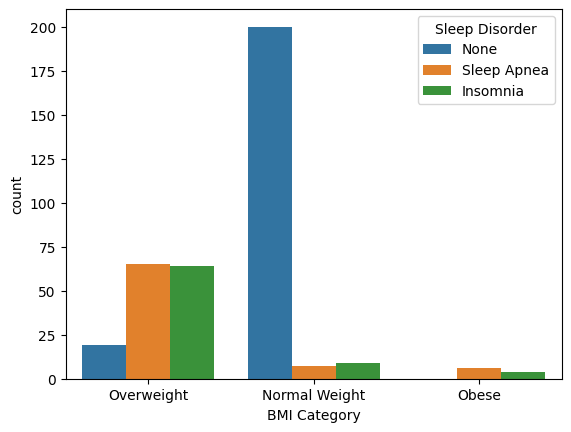

In [54]:
sns.countplot(x='BMI Category', data = df, hue='Sleep Disorder')
plt.show()

## ↘️ Sleep Disorder Prevalence by BMI Category cont'd

Sleep Disorder  Insomnia      None  Sleep Apnea
BMI Category                                   
Normal Weight   0.041667  0.925926     0.032407
Obese           0.400000  0.000000     0.600000
Overweight      0.432432  0.128378     0.439189


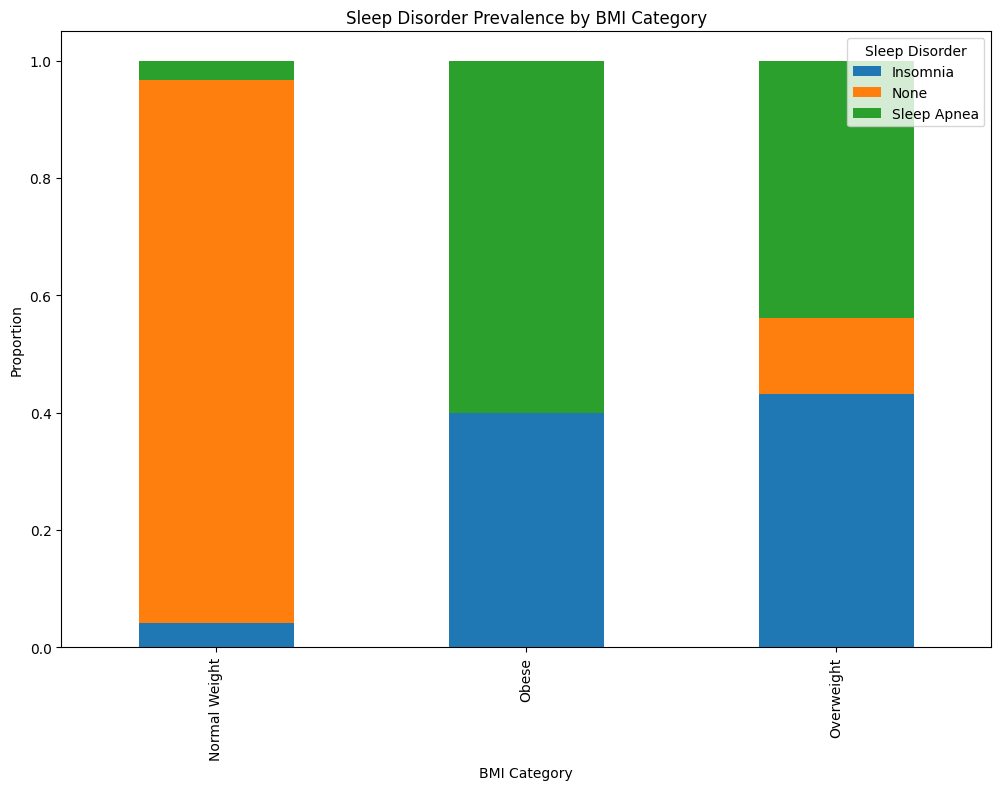

In [55]:
sleep_disorder_bmi = df.groupby('BMI Category')['Sleep Disorder'].value_counts(normalize=True).unstack().fillna(0)
print(sleep_disorder_bmi)

sleep_disorder_bmi.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sleep Disorder Prevalence by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Proportion')
plt.legend(title='Sleep Disorder')
plt.show()

## 🗒️ **Conclusions**

Our aim was to look at how sleep is affected by: Age, Gender, Occupation, Physical Activity, Stress and BMI

↘️ Let's look at each category and reflect on our findings:

❓ **AGE**

☑️ Our findings:

❌ Inconclusive

* Insomnia appears to be slightly more prevalent in the under 55s but the oldest person in the sample 59 so we would need a broader range of ages to draw any conclusions

❓ **GENDER**

☑️ Our findings:

* Women are **significantly more likely** to have a sleep disorder

* Men **suffer from insomnia more** than women do

* Women **suffer from sleep apnea significantly more** than men do

❓ **OCCUPATION**

☑️ Our findings:

* Sales Representatives are the most stressed, have the poorest quality of sleep and sleep for the shortest amount of time

* Engineers are the less stressed, have the highest quality of sleep and sleep for the longest amount of time

❓ **PHYSICAL ACTIVITY**

☑️ Our findings:

* The relationship between Physical Activity Level and Sleep Duration suggests that those who are more physically active sleep for longer

❌ The relationship between Physical Activity Level and Quality of Sleep is inconclusive

❓ **STRESS**

☑️ Our findings:

* The relationship between Stress Level and Sleep Duration suggests those who feel less stressed enjoy more sleep
* The relationship between Stress Level and Sleep Quality suggests those who feel less stressed enjoy better quality sleep

❓ **BMI**

☑️ Our findings:

* People within the ‘Normal Weight’ category are the most likely **NOT** to have a sleep disorder
* Sleep apnea affects more people who are 'Overweight' and 'Obese'

💡 **OTHER FINDINGS**

The relationship between Sleep Duration and Sleep Quality suggests that the longer the duration, the better the quality the sleep